In [82]:
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from semaxis import *
import numpy as np

pretrained_model_path = 'models/full_young.wordvectors'

# Load the Word2Vec model
word2vec_model = KeyedVectors.load(pretrained_model_path, mmap='r')         # full model
male_model = KeyedVectors.load('models/male_full.wordvectors', mmap='r')
female_model = KeyedVectors.load('models/female_full.wordvectors', mmap='r')

In [83]:
# Example usage
# word_embedding = word2vec_model['cake']
# print(f'Embedding for "cake": {word_embedding[:5]} ...')
# Find similar words
word_check = "protagonist"
similar_words = word2vec_model.most_similar(word_check, topn=8)
print(f'Similar words to '+word_check+f': {similar_words}')

word_check = "love"
similar_words = word2vec_model.most_similar(word_check, topn=8)
print(f'Similar words to '+word_check+f': {similar_words}')

Similar words to protagonist: [('mc', 0.8994240164756775), ('protag', 0.8668676614761353), ('protaganist', 0.8627985119819641), ('heroine', 0.817948043346405), ('protaginist', 0.8140376806259155), ('narratorprotagonist', 0.7992725372314453), ('female', 0.7978363633155823), ('protaganists', 0.7948732972145081)]
Similar words to love: [('lovethis', 0.7764689922332764), ('looooove', 0.7555156946182251), ('loooove', 0.742493212223053), ('lovei', 0.7365704774856567), ('equilateral', 0.7351792454719543), ('trianglesbut', 0.7330654859542847), ('headsoverheels', 0.7283716201782227), ('trianglelove', 0.7224496006965637)]


In [8]:
word_check = "protagonist"
similar_words = male_model.most_similar(word_check, topn=8)
print(f'Similar words to '+word_check+f': {similar_words}')
word_check = "protagonist"
similar_words = female_model.most_similar(word_check, topn=8)
print(f'Similar words to '+word_check+f': {similar_words}')

Similar words to protagonist: [('mc', 0.8121954798698425), ('narrator', 0.7896241545677185), ('main', 0.7759931087493896), ('character', 0.760754406452179), ('character/narrator', 0.760174036026001), ('everyman', 0.7148529291152954), ('hero', 0.704007625579834), ('character-', 0.6981883645057678)]
Similar words to protagonist: [('heroine', 0.8979477286338806), ('mc', 0.8782995343208313), ('character', 0.8130983710289001), ('protaganist', 0.8037758469581604), ('protag', 0.7916674613952637), ('narrator', 0.7899377942085266), ('character-', 0.7799121141433716), ('female', 0.776492714881897)]


In [69]:
def check_axis_old(word_pair):
    word_check = word_pair[0]
    similar_words = word2vec_model.most_similar(word_check, topn=8)
    print(f'Similar words to '+word_check+f': {similar_words}')
    word_check = word_pair[1]
    similar_words = word2vec_model.most_similar(word_check, topn=8)
    print(f'Similar words to '+word_check+f': {similar_words}')

In [220]:
def check_axis(word_pair, emb):
    word_check = word_pair[0]
    similar_words = emb.most_similar(word_check, topn=8)
    print(f'Similar words to '+word_check+f': {similar_words}')
    word_check = word_pair[1]
    similar_words = emb.most_similar(word_check, topn=8)
    print(f'Similar words to '+word_check+f': {similar_words}')

In [24]:
axis_words = ["evil","good"]
axis = transform_antonym_to_axis(word2vec_model,axis_words,10)
print(cosine_similarity(word2vec_model["evil"],axis))

-0.505638062953949


In [22]:
def plot_line_graphs(categories, label='plot label'):
    """
    Plot line graphs for multiple categories using matplotlib with tilted x-axis labels and different colors.

    Parameters:
    - categories (list of tuples): Each tuple contains a category name, a list of value names, and a list of values.

    Returns:
    - None
    """
    # Define a list of colors for each category
    colors = ['b', 'g', 'r']

    # Plotting line graphs for each category
    for i, (category, names, values) in enumerate(categories):
        plt.plot(names, values, marker='o', linestyle='-', label=category, color=colors[i])

    # Adding labels and title
    plt.xlabel('Axis pairs')
    plt.ylabel('Average projection values')
    plt.title(label)
    
    # Tilt x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Display legend
    plt.legend()
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Show the plot
    plt.show()

# # Example usage:
# categories_data = [
#     ('Category 1', ['Label A', 'Label B', 'Label C', 'Label D', 'Label E'], [10, 20, 15, 25, 30]),
#     ('Category 2', ['Label F', 'Label G', 'Label H', 'Label I', 'Label J'], [5, 15, 10, 20, 25]),
# ]

# plot_line_graphs(categories_data)

In [214]:
def plot_line_graphs_horizontal(categories, label='plot label', embed_projec = False):
    """
    Plot line graphs for multiple categories using matplotlib with tilted x-axis labels and different colors.

    Parameters:
    - categories (list of tuples): Each tuple contains a category name, a list of value names, and a list of values.

    Returns:
    - None
    """
    # Define a list of colors for each category
    # colors = ['#88CCEE', '#882255', '#DDCC77', '#44AA99']
    colors = ['#88CCEE', '#882255', '#ADADAD']

    if embed_projec:
        colors = ['#69AF5A', '#9058C2']

    plt.figure(figsize = (5.5, 7))
    plt.axvline(x = 0.0, color = '#D2D2D2', linestyle = ':') 

    # Plotting line graphs for each category
    for i, (category, names, values) in enumerate(categories):
        if 'gender-neutral' in category.lower():
            linestyle_selection = '--'
        else:
            linestyle_selection = '-'
            
        plt.plot(values, names, marker='o', linestyle = linestyle_selection, label=category, color=colors[i])

    # Adding labels and title
    #plt.xlabel('Axis pairs')
    plt.xlabel('Average projection value')
    plt.title(label)
    
    # Tilt x-axis labels for better readability
    plt.xticks(ha='right')

    # Display legend
    #plt.legend()
    if embed_projec:
        legend_title = 'Embeddings'
    else:
        legend_title = 'Terms'
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = legend_title)

    # Show the plot
    plt.show()

In [10]:
def evaluate_axis(embedding, axis_pair, evaluation_words,  k=5):
    results = []
    axis = transform_antonym_to_axis(embedding, axis_pair, k)
    for word in evaluation_words:
        results.append(cosine_similarity(embedding[word],axis))
    return np.mean(results)
def evaluate_axes(embedding, axis_pairs, evaluation_words, label="", k=5):
    results = []
    names = []
    values = []
    for axis_pair in axis_pairs:
        values.append(evaluate_axis(embedding, axis_pair, evaluation_words, k=k))
        names.append(axis_pair[0]+"-"+axis_pair[1])
    return (label, names, values)

In [197]:
#axis_pairs = np.char.lower(np.loadtxt("axis.csv", dtype=str, delimiter=","))
axis_pairs_ant = np.char.lower(np.loadtxt("axes/final_antonyms.csv", dtype=str, delimiter=","))
axis_pairs_con = np.char.lower(np.loadtxt("axes/final_connotations.csv", dtype=str, delimiter=","))

In [130]:
female_terms = ['she', 'her', 'hers', 'woman', 'girl','heroine']
male_terms = ['he', 'him', 'his', 'man', 'guy', 'hero']
protag_terms = ['protagonist', 'mc','character','main']
random_terms = ['cake', 'god', 'fish', 'bread', 'calendar', 'bicycle', 'window', 'coffee', 'book']

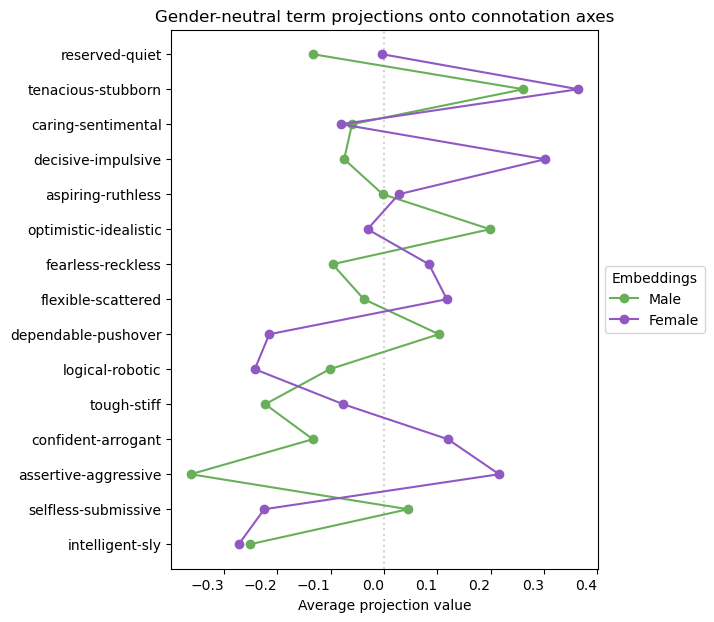

In [215]:
results = []

results.append(evaluate_axes(female_model, axis_pairs_con, protag_terms ,label="Male",k=5))

results.append(evaluate_axes(male_model, axis_pairs_con, protag_terms,label="Female",k=5))

plot_line_graphs_horizontal(results, label="Gender-neutral term projections onto connotation axes", embed_projec = True)

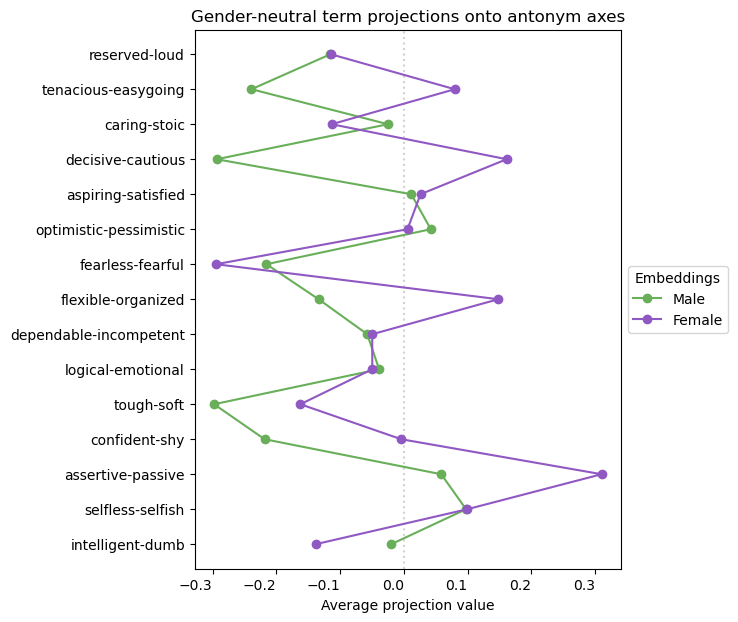

In [216]:
results = []

results.append(evaluate_axes(female_model, axis_pairs_ant, protag_terms ,label="Male",k=5))

results.append(evaluate_axes(male_model, axis_pairs_ant, protag_terms,label="Female",k=5))

plot_line_graphs_horizontal(results, label="Gender-neutral term projections onto antonym axes", embed_projec = True)


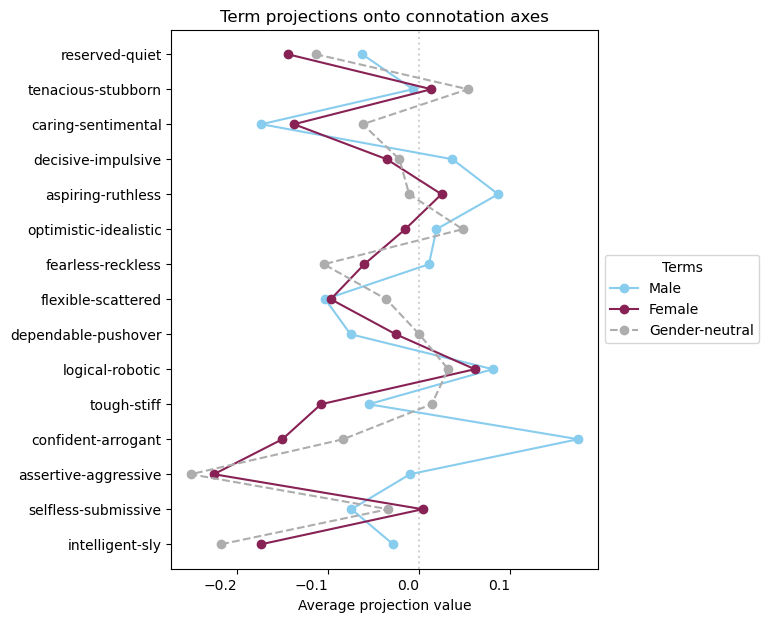

In [217]:
results = []
results.append(evaluate_axes(word2vec_model, axis_pairs_con, male_terms[:7] ,label="Male",k=5))
results.append(evaluate_axes(word2vec_model, axis_pairs_con, female_terms[:7],label="Female",k=5))
results.append(evaluate_axes(word2vec_model, axis_pairs_con, protag_terms[:7],label="Gender-neutral",k=5))

#results.append(evaluate_axes(word2vec_model, axis_pairs_con, random_terms[:7],label="random terms",k=5))


plot_line_graphs_horizontal(results, 'Term projections onto connotation axes')


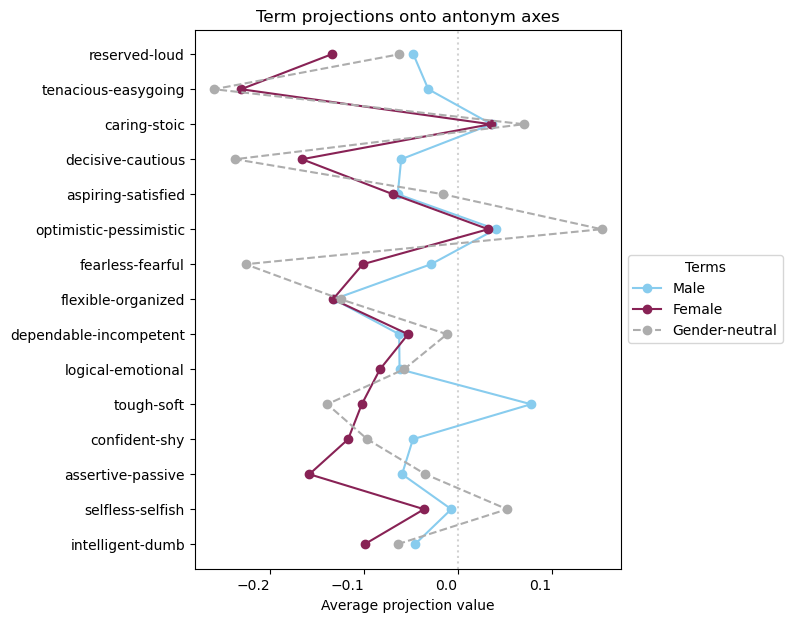

In [218]:

results = []


results.append(evaluate_axes(word2vec_model, axis_pairs_ant, male_terms[:7] ,label="Male",k=5))

results.append(evaluate_axes(word2vec_model, axis_pairs_ant, female_terms[:7],label="Female",k=5))

results.append(evaluate_axes(word2vec_model, axis_pairs_ant, protag_terms[:7],label="Gender-neutral",k=5))

plot_line_graphs_horizontal(results, 'Term projections onto antonym axes')

In [221]:
for pair in axis_pairs_con:
    print("pair:")
    check_axis(pair)    # should be check_axis(pair, emb)

pair:


TypeError: check_axis() missing 1 required positional argument: 'emb'